# Acute Inflammations
**SOURCE: https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations**

**Abstract:** The data was created by a medical expert as a data set to test 
the expert system, which will perform the presumptive diagnosis of two 
diseases of the urinary system.
	
----------------------------------------------------------------------------

Data Set Characteristics:  Multivariate<br/>
Attribute Characteristics: Categorical, Integer<br/>
Associated Tasks: Classification<br/>
Number of Instances: 120<br/>
Number of Attributes: 6<br/>
Missing Values? No<br/>
Area: Life<br/>
Date Donated: 2009-02-11<br/>

----------------------------------------------------------------------------

## Source:

Jacek Czerniak, Ph.D., Assistant Professor<br/>
Systems Research Institute<br/>
Polish Academy of Sciences<br/>
Laboratory of Intelligent Systems<br/>
ul. Newelska 6, Room 218<br/>
01-447 Warszawa, Poland<br/>
e-mail: jacek.czerniak 'at' ibspan.waw.pl or jczerniak 'at' ukw.edu.pl <br/>

----------------------------------------------------------------------------


## Data Set Information:

The main idea of this data set is to prepare the algorithm of the expert 
system, which will perform the presumptive diagnosis of two diseases of 
urinary system. It will be the example of diagnosing of the acute 
inflammations of urinary bladder and acute nephritises. For better 
understanding of the problem let us consider definitions of both 
diseases given by medics. Acute inflammation of urinary bladder is
characterised by sudden occurrence of pains in the abdomen region and 
the urination in form of constant urine pushing, micturition pains and 
sometimes lack of urine keeping. Temperature of the body is rising, 
however most often not above 38C. The excreted urine is turbid and 
sometimes bloody. At proper treatment, symptoms decay usually within 
several days. However, there is inclination to returns. At persons with 
acute inflammation of urinary bladder, we should expect that the illness 
will turn into protracted form.

Acute nephritis of renal pelvis origin occurs considerably more often at 
women than at men. It begins with sudden fever, which reaches, and 
sometimes exceeds 40C. The fever is accompanied by shivers and one- or 
both-side lumbar pains, which are sometimes very strong. Symptoms of 
acute inflammation of urinary bladder appear very often. Quite not 
infrequently there are nausea and vomiting and spread pains of whole 
abdomen.

The data was created by a medical expert as a data set to test the 
expert system, which will perform the presumptive diagnosis of two 
diseases of urinary system. The basis for rules detection was Rough Sets 
Theory. Each instance represents an potential patient.

The data is in an ASCII file. Attributes are separated by TAB. Each line 
of the data file starts with a digit which tells the temperature of patient.

-- Attribute lines:<br/>
For example, '35,9 no no yes yes yes yes no'<br/>
Where:<br/>
'35,9' Temperature of patient<br/>
'no' Occurrence of nausea<br/>
'no' Lumbar pain<br/>
'yes' Urine pushing (continuous need for urination)<br/>
'yes' Micturition pains<br/>
'yes' Burning of urethra, itch, swelling of urethra outlet<br/>
'yes' decision: Inflammation of urinary bladder<br/>
'no' decision: Nephritis of renal pelvis origin<br/>

----------------------------------------------------------------------------

## Attribute Information:

a1 Temperature of patient { 35C-42C }<br/>
a2 Occurrence of nausea { yes, no }<br/>
a3 Lumbar pain { yes, no }<br/>
a4 Urine pushing (continuous need for urination) { yes, no }<br/>
a5 Micturition pains { yes, no }<br/>
a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }<br/>
d1 decision: Inflammation of urinary bladder { yes, no }<br/>
d2 decision: Nephritis of renal pelvis origin { yes, no } <br/>

----------------------------------------------------------------------------

## Relevant Papers:

J.Czerniak, H.Zarzycki, Application of rough sets in the presumptive 
diagnosis of urinary system diseases, Artifical Inteligence and Security 
in Computing Systems, ACS'2002 9th International Conference Proceedings, 
Kluwer Academic Publishers,2003, pp. 41-51

----------------------------------------------------------------------------

## Citation Request:

Please cite:

J.Czerniak, H.Zarzycki, Application of rough sets in the presumptive 
diagnosis of urinary system diseases, Artifical Inteligence and Security 
in Computing Systems, ACS'2002 9th International Conference Proceedings, 
Kluwer Academic Publishers,2003, pp. 41-51 

In [1]:
import urllib.request

def download_url(url, save_as):
    response = urllib.request.urlopen(url)
    data = response.read()
    file = open(save_as, 'wb')
    file.write(data)
    file.close()
    response.close()
    
def read_binary_file(file):
    f = open(file,'rb')
    block = f.read()
    return block.decode('utf-16')

def split_text_in_lines(text):
    return text.split('\r\n')

def split_by_tabs(line):
    return line.split('\t')

In [2]:
names_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names'
data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data'
diagnosis_names = 'diagnosis.names'
diagnosis_data = 'diagnosis.data'
download_url(names_link, diagnosis_names)
download_url(data_link, diagnosis_data)

In [3]:
import numpy as np

def parse_double(field):
    field = field.replace(',', '.')
    return float(field)

def parse_boolean(field):
    return 1. if field == 'yes' else 0.

def read_np_array(file = diagnosis_data):
    text = read_binary_file(file)
    lines = split_text_in_lines(text)
    rows = []
    for line in lines:
        if line == '': continue
        line = line.replace('\r\n', '')
        fields = split_by_tabs(line)
        row = []
        j = 0
        for field in fields:
            value = parse_double(field) if j == 0 else parse_boolean(field)
            row.append(value)
            j += 1
        rows.append(row)
    matrix = np.array(rows, dtype = np.float32)
    return matrix

def get_random_indexes(n):
    indexes = list(range(n))
    random_indexes = []
    for i in range(n):
        r = np.random.randint(len(indexes))
        random_indexes.append(indexes.pop(r))
    return random_indexes

def get_indexes_for_2_datasets(n, training = 80):
    indexes = get_random_indexes(n)
    train = int(training / 100. * n)
    return indexes[:train], indexes[train:]

matrix = read_np_array()
n_samples, n_dimensions = matrix.shape

train_indexes, test_indexes = get_indexes_for_2_datasets(n_samples)
train_data = matrix[train_indexes]
test_data = matrix[test_indexes]

def print_dataset(name, data):
    print('Dataset {}. Shape: {}'.format(name, data.shape))
    print(data)

print_dataset('Train', train_data)
print_dataset('Test', test_data)

Dataset Train. Shape: (96, 8)
[[40.2  1.   1.   1.   1.   1.   1.   1. ]
 [37.9  0.   0.   1.   0.   0.   1.   0. ]
 [37.2  0.   1.   0.   0.   0.   0.   0. ]
 [37.4  0.   0.   1.   0.   0.   1.   0. ]
 [36.8  0.   0.   1.   1.   1.   1.   0. ]
 [40.4  1.   1.   0.   1.   0.   0.   1. ]
 [36.6  0.   0.   1.   1.   1.   1.   0. ]
 [37.3  0.   0.   1.   1.   1.   1.   0. ]
 [35.5  0.   1.   0.   0.   0.   0.   0. ]
 [37.8  0.   0.   1.   1.   1.   1.   0. ]
 [36.6  0.   0.   1.   1.   1.   1.   0. ]
 [37.   0.   0.   1.   1.   0.   1.   0. ]
 [40.7  0.   1.   1.   0.   1.   0.   1. ]
 [38.5  0.   1.   1.   0.   1.   0.   1. ]
 [37.9  0.   0.   1.   1.   0.   1.   0. ]
 [40.2  0.   0.   0.   0.   0.   0.   0. ]
 [41.5  0.   1.   1.   0.   1.   0.   1. ]
 [36.7  0.   1.   0.   0.   0.   0.   0. ]
 [37.5  0.   0.   1.   0.   0.   1.   0. ]
 [37.   0.   0.   1.   1.   1.   1.   0. ]
 [37.6  0.   0.   1.   1.   1.   1.   0. ]
 [37.3  0.   0.   1.   0.   0.   1.   0. ]
 [40.2  1.   1.   0.   1

In [4]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

input_size = 6
learning_rate = 0.01
num_iterations = 10000

class LogisticRegression(torch.nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        return F.sigmoid(self.linear(x))
    
model = LogisticRegression()
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

def decide(y):
    return 1. if y >= 0.5 else 0.

decide_vectorized = np.vectorize(decide)

def compute_accuracy(data):
    input = Variable(torch.tensor(data[:, :6], dtype = torch.float32))
    output = Variable(torch.tensor(data[:, 6], dtype = torch.float32))
    prediction = model(input).data.numpy()[:, 0]
    n_samples = prediction.shape[0] + 0.
    prediction = decide_vectorized(prediction)
    equal = prediction == output.data.numpy()
    return equal.sum() / n_samples

losses = []
accuracies = []
n_samples, _ = train_data.shape
for iteration in range(num_iterations):
        input = Variable(torch.tensor(train_data[:, :6], dtype = torch.float32))
        output = Variable(torch.tensor(train_data[:, 6], dtype = torch.float32))
        optimizer.zero_grad()
        prediction = model(input)
        loss = criterion(prediction, output)
        loss.backward()
        optimizer.step()
        if iteration % 500 == 0:
            train_acc = compute_accuracy(train_data)
            test_acc = compute_accuracy(test_data)
            train_loss = loss.item()
            losses.append(train_loss)
            accuracies.append(train_acc)
            print('iteration={}, loss={:.4f}, train_acc={}, test_acc={}'.format(iteration, train_loss, train_acc, test_acc))

/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([96])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


iteration=0, loss=1.5790, train_acc=0.4791666666666667, test_acc=0.625
iteration=500, loss=1.4173, train_acc=0.4791666666666667, test_acc=0.625
iteration=1000, loss=0.7992, train_acc=0.4791666666666667, test_acc=0.625
iteration=1500, loss=0.2122, train_acc=0.9270833333333334, test_acc=0.875
iteration=2000, loss=0.1819, train_acc=1.0, test_acc=1.0
iteration=2500, loss=0.1645, train_acc=1.0, test_acc=1.0
iteration=3000, loss=0.1503, train_acc=1.0, test_acc=1.0
iteration=3500, loss=0.1384, train_acc=1.0, test_acc=1.0
iteration=4000, loss=0.1283, train_acc=1.0, test_acc=1.0
iteration=4500, loss=0.1197, train_acc=1.0, test_acc=1.0
iteration=5000, loss=0.1121, train_acc=1.0, test_acc=1.0
iteration=5500, loss=0.1055, train_acc=1.0, test_acc=1.0
iteration=6000, loss=0.0997, train_acc=1.0, test_acc=1.0
iteration=6500, loss=0.0944, train_acc=1.0, test_acc=1.0
iteration=7000, loss=0.0897, train_acc=1.0, test_acc=1.0
iteration=7500, loss=0.0855, train_acc=1.0, test_acc=1.0
iteration=8000, loss=0.0

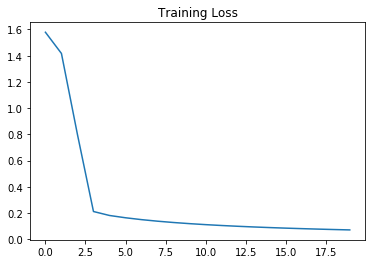

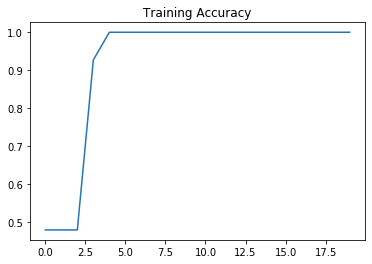

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(losses)
plt.title("Training Loss")
plt.show()

plt.plot(accuracies)
plt.title("Training Accuracy")
plt.show()